In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from itertools import product

# EDA

Attributes

- People

  - ID: Customer's unique identifier
  - Year_Birth: Customer's birth year
  - Education: Customer's education level
  - Marital_Status: Customer's marital status
  - Income: Customer's yearly household income
  - Kidhome: Number of children in customer's household
  - Teenhome: Number of teenagers in customer's household
  - Dt_Customer: Date of customer's enrollment with the company
  - Recency: Number of days since customer's last purchase
  - Complain: 1 if the customer complained in the last 2 years, 0 otherwise

- Products

  - MntWines: Amount spent on wine in last 2 years
  - MntFruits: Amount spent on fruits in last 2 years
  - MntMeatProducts: Amount spent on meat in last 2 years
  - MntFishProducts: Amount spent on fish in last 2 years
  - MntSweetProducts: Amount spent on sweets in last 2 years
  - MntGoldProds: Amount spent on gold in last 2 years

- Promotion

  - NumDealsPurchases: Number of purchases made with a discount
  - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
  - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
  - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
  - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
  - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
  - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

- Place

  - NumWebPurchases: Number of purchases made through the company’s website
  - NumCatalogPurchases: Number of purchases made using a catalogue
  - NumStorePurchases: Number of purchases made directly in stores
  - NumWebVisitsMonth: Number of visits to company’s website in the last month

In [2]:
df_marketing_campaign = pd.read_csv('datasets/marketing_campaign.csv', sep='\t')

In [3]:
if(pd.options.display.max_columns < df_marketing_campaign.shape[1]):
  pd.options.display.max_columns = df_marketing_campaign.shape[1]

In [4]:
df_marketing_campaign.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
df_marketing_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df_marketing_campaign.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
pd.options.display.max_columns = df_marketing_campaign.shape[1]
df_marketing_campaign.describe()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Numeric columns

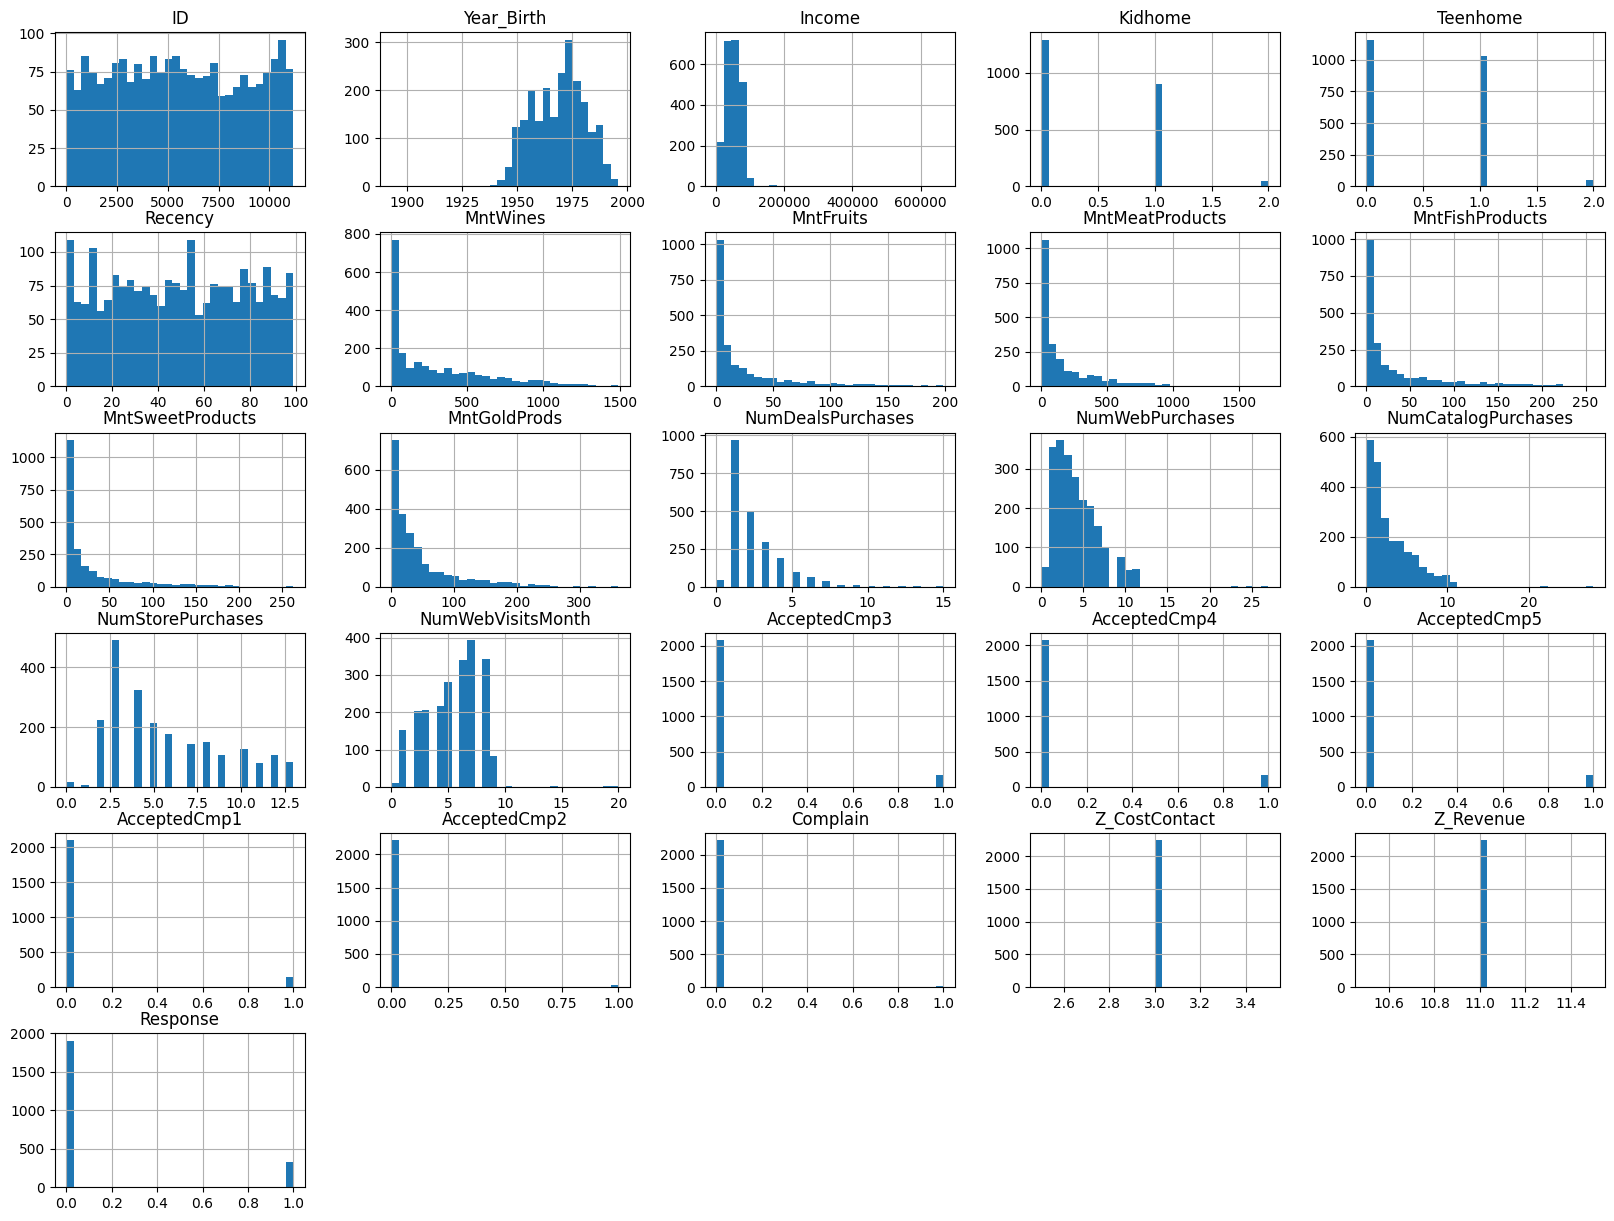

In [8]:
df_marketing_campaign.hist(bins=30, figsize=(20, 15))
plt.show()

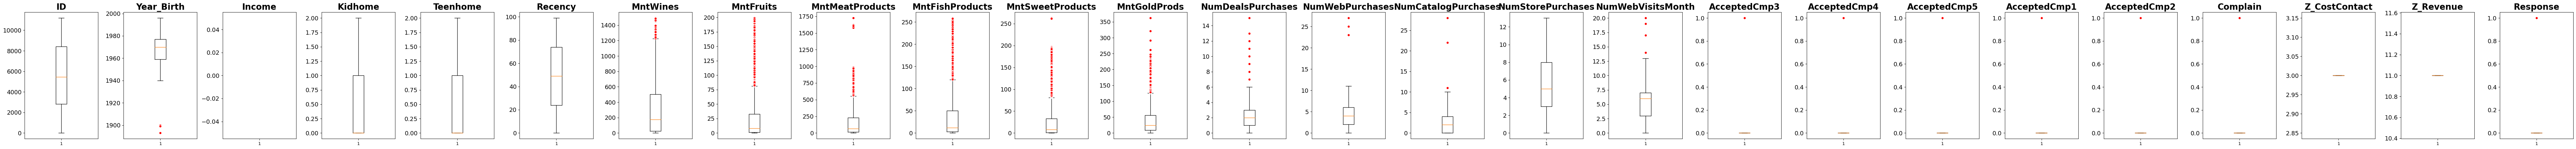

In [9]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
df_marketing_campaign_num = df_marketing_campaign.select_dtypes(include='number')
fig, axs = plt.subplots(1, len(df_marketing_campaign_num.columns), figsize=(85,5))
print(axs.flat)
for i, ax in enumerate(axs.flat):
  ax.boxplot(df_marketing_campaign_num.iloc[:,i], flierprops=red_circle)
  ax.set_title(df_marketing_campaign_num.columns[i], fontsize=20, fontweight='bold')
  ax.tick_params(axis='y', labelsize=14)
  
plt.tight_layout()

---

List of numeric columns to analyze:
1. Year_birth (also we considerate it as Datetime object)
2. Income
4. MntMeatProducts
5. MntSweetProducts
6. NumWebPurchases
7. NumCatalogPurchases
8. NumWebVisitsMonth
9. Z_CostContact
10. Z_Revenue

---

## Object columns

In [10]:
df_marketing_campaign.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


Dt_customer is a Datetime object

In [11]:
df_marketing_campaign['Dt_Customer'] = pd.to_datetime(df_marketing_campaign['Dt_Customer'], format='%d-%m-%Y')


Education


Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


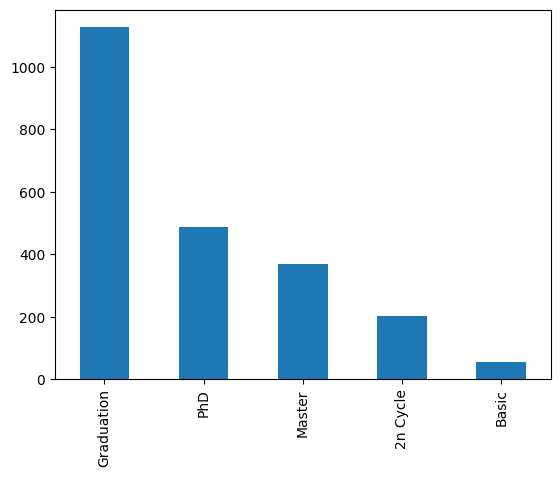



Marital_Status


Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


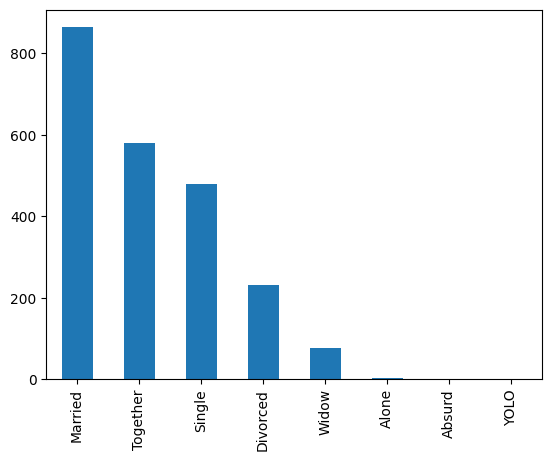

In [12]:
df_marketing_campaign.select_dtypes(include='object').value_counts()

df_marketing_campaign_object = df_marketing_campaign.select_dtypes(include='object')
df_marketing_campaign_object_columns = df_marketing_campaign.select_dtypes(include='object').columns

for col in df_marketing_campaign_object_columns:
  print(col)
  print('\n')
  print(df_marketing_campaign_object[col].value_counts())
  df_marketing_campaign_object[col].value_counts().plot(kind='bar')
  plt.show()
  print('\n')


---

To do in object columns:
1. Ordinal encoder in Education column
2. Drop Absurd and YOLO values, group Alone with Single, and apply One Hot Encoder in Marital_Status column

---

## Datetime column

<AxesSubplot: >

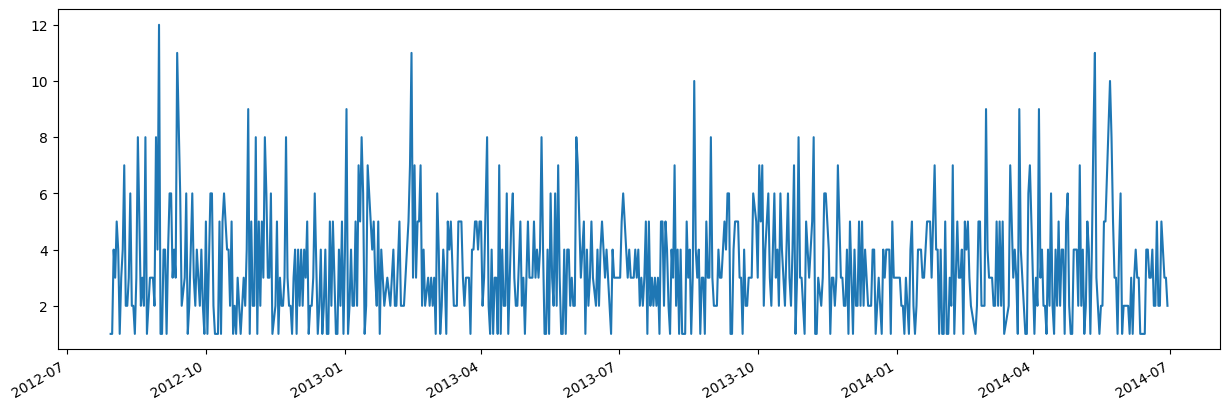

In [13]:
df_marketing_campaign['Dt_Customer'].value_counts().plot(figsize=(15,5))

## Cleaning and Feature Engineering

In [15]:
df_marketing_campaign.describe(include=['object', 'number'])


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Year_Birth Column

We create a new column to determine if makes sense the age that people had at the moment of enrollment with the company. If not, we drop those rows

<AxesSubplot: >

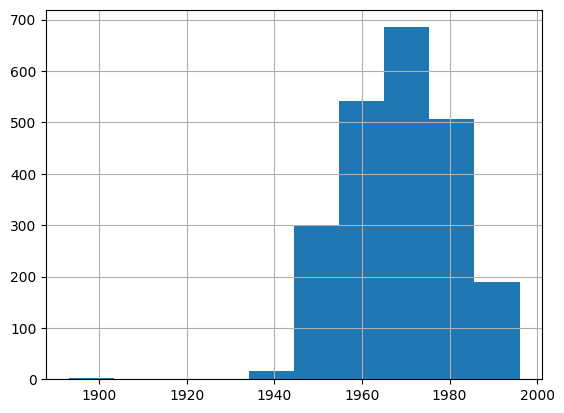

In [16]:
df_marketing_campaign['Year_Birth'].hist()

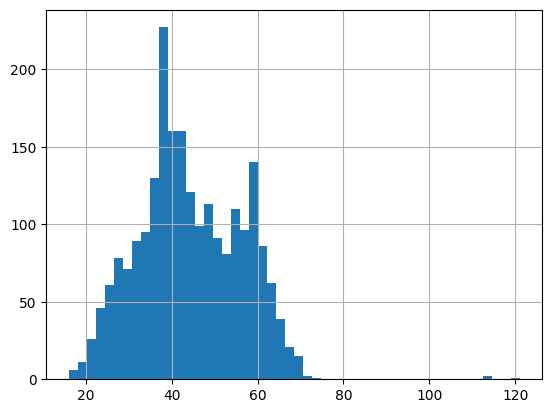

61     36
62     50
63     30
64     32
65     18
66     21
67     12
68      9
69      6
70      9
71      1
72      1
73      1
113     1
114     1
121     1
Name: age_customer_enrollment, dtype: int64


In [17]:
df_marketing_campaign['age_customer_enrollment'] = pd.to_datetime(df_marketing_campaign['Dt_Customer'], format='%d-%m-%Y').dt.year - pd.to_datetime(df_marketing_campaign['Year_Birth'], format='%Y').dt.year

df_marketing_campaign['age_customer_enrollment'].hist(bins=50)
plt.show()
print(df_marketing_campaign[df_marketing_campaign['age_customer_enrollment']> 60]['age_customer_enrollment'].value_counts().sort_index())

Drop rows where the age of the customer is more than 73

<AxesSubplot: >

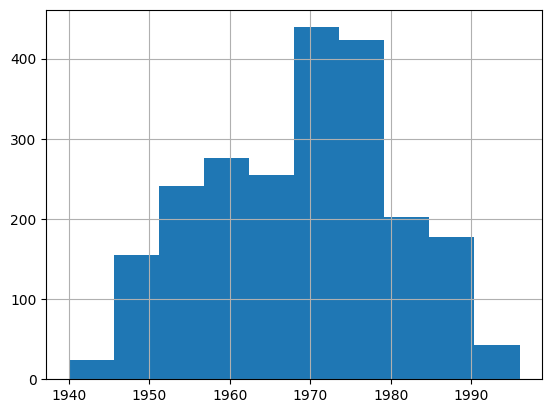

In [18]:
index_to_drop = df_marketing_campaign[df_marketing_campaign['age_customer_enrollment']> 73].index

df_marketing_campaign.drop(index=index_to_drop, axis=0, inplace=True)
df_marketing_campaign['Year_Birth'].hist()

### Income Column

First, we drop the null values that we have only found in the Income column, then we analize for outliers and remove if considered

In [21]:
df_marketing_campaign.dropna(inplace=True)

In [40]:
df_marketing_campaign['Income'].describe()

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

In [28]:
df_marketing_campaign['Income'].sort_values(ascending=False).head(15)

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
2132    156924.0
655     153924.0
1898    113734.0
646     105471.0
252     102692.0
203     102160.0
124     101970.0
650      98777.0
1113     98777.0
Name: Income, dtype: float64

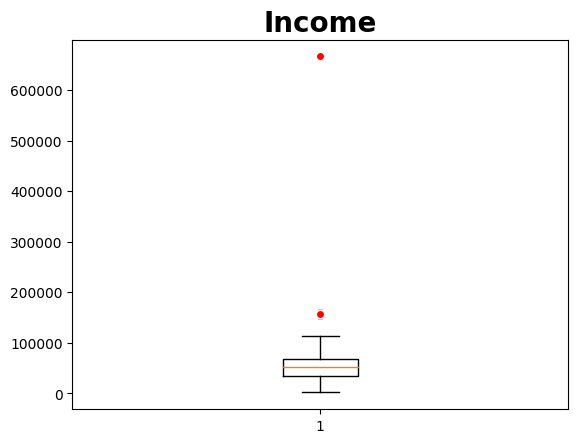

In [35]:
plt.boxplot(df_marketing_campaign['Income'], flierprops=red_circle)
plt.title('Income')
plt.show()

In [ ]:
index_to_drop = df_marketing_campaign['Income'][df_marketing_campaign['Income'] == 666666].index
df_marketing_campaign.drop(index=index_to_drop, inplace=True, axis=0)

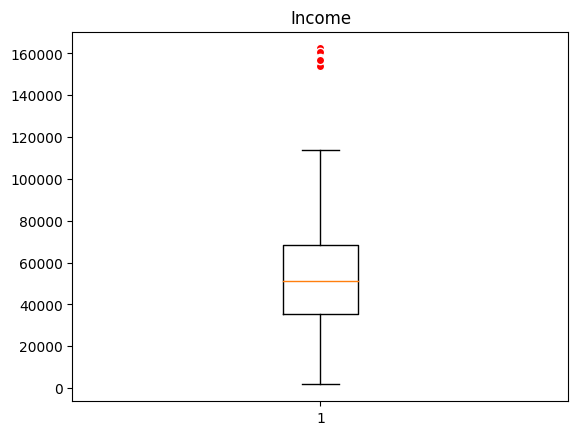

In [49]:
plt.boxplot(df_marketing_campaign['Income'], flierprops=red_circle)
plt.title('Income')
plt.show()

### MntMeatProducts Column

Remove outliers

In [51]:
df_marketing_campaign['MntMeatProducts'].describe()

count    2212.000000
mean      167.029837
std       224.254493
min         0.000000
25%        16.000000
50%        68.000000
75%       232.250000
max      1725.000000
Name: MntMeatProducts, dtype: float64

In [53]:
df_marketing_campaign['MntMeatProducts'].sort_values(ascending=False).head(15)

21      1725
1653    1725
687     1622
164     1582
1358     984
1808     981
456      974
2109     968
1031     961
126      951
1958     951
1259     946
561      940
1713     936
1721     935
Name: MntMeatProducts, dtype: int64

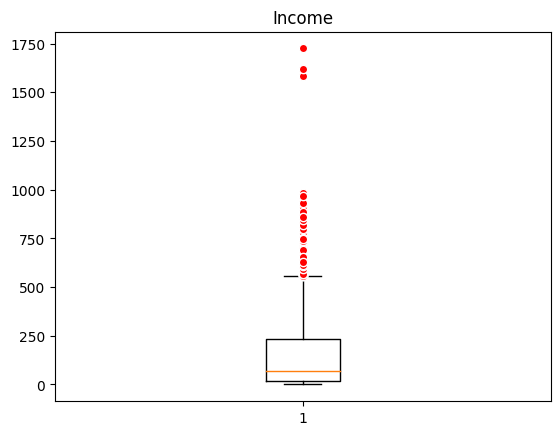

In [54]:
plt.boxplot(df_marketing_campaign['MntMeatProducts'], flierprops=red_circle)
plt.title('MntMeatProducts')
plt.show()

In [57]:
index_to_drop = df_marketing_campaign['MntMeatProducts'][df_marketing_campaign['MntMeatProducts'] > 1500].index
df_marketing_campaign.drop(index=index_to_drop, inplace=True, axis=0)

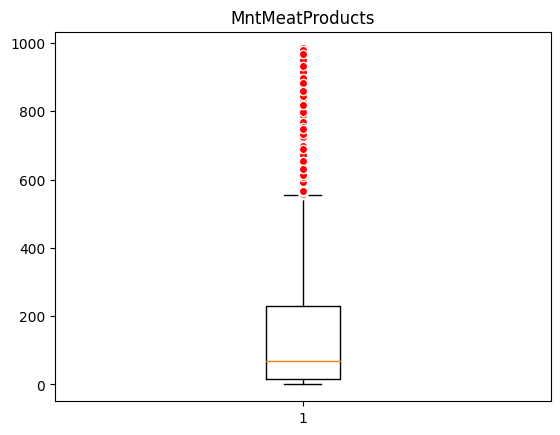

In [58]:
plt.boxplot(df_marketing_campaign['MntMeatProducts'], flierprops=red_circle)
plt.title('MntMeatProducts')
plt.show()

### MntSweetProducts Column

In [59]:
df_marketing_campaign['MntSweetProducts'].describe()

count    2208.000000
mean       27.092391
std        41.114069
min         0.000000
25%         1.000000
50%         8.000000
75%        33.250000
max       262.000000
Name: MntSweetProducts, dtype: float64

In [60]:
df_marketing_campaign['MntSweetProducts'].sort_values(ascending=False).head(15)

1898    262
634     198
1513    197
1671    196
1253    195
2012    194
456     194
1484    194
2168    192
470     192
2096    192
461     191
1259    189
347     189
1824    188
Name: MntSweetProducts, dtype: int64

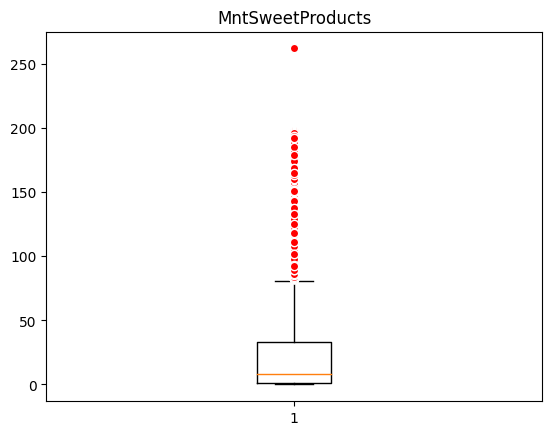

In [61]:
plt.boxplot(df_marketing_campaign['MntSweetProducts'], flierprops=red_circle)
plt.title('MntSweetProducts')
plt.show()

In [62]:
index_to_drop = df_marketing_campaign['MntSweetProducts'][df_marketing_campaign['MntSweetProducts'] > 200].index
df_marketing_campaign.drop(index=index_to_drop, inplace=True, axis=0)

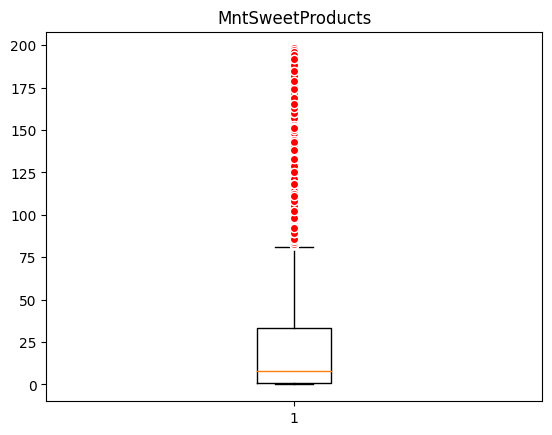

In [64]:
plt.boxplot(df_marketing_campaign['MntSweetProducts'], flierprops=red_circle)
plt.title('MntSweetProducts')
plt.show()

### NumWebPurchases Column

In [66]:
df_marketing_campaign['NumWebPurchases'].describe()

count    2207.000000
mean        4.085184
std         2.695988
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        25.000000
Name: NumWebPurchases, dtype: float64

In [67]:
df_marketing_campaign['NumWebPurchases'].sort_values(ascending=False).head(15)

1975    25
1806    23
2033    11
2171    11
1252    11
412     11
2145    11
1226    11
219     11
1539    11
209     11
202     11
2013    11
983     11
2030    11
Name: NumWebPurchases, dtype: int64

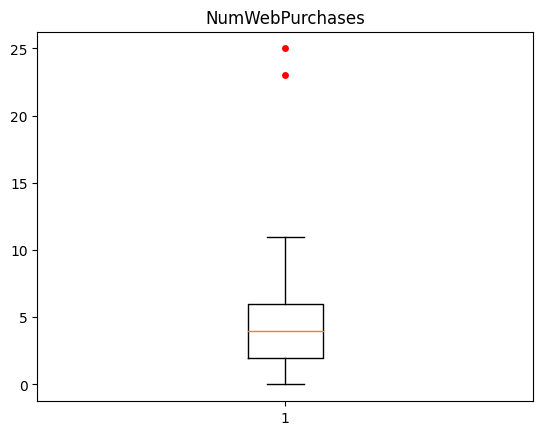

In [68]:
plt.boxplot(df_marketing_campaign['NumWebPurchases'], flierprops=red_circle)
plt.title('NumWebPurchases')
plt.show()

In [69]:
index_to_drop = df_marketing_campaign['NumWebPurchases'][df_marketing_campaign['NumWebPurchases'] > 20].index
df_marketing_campaign.drop(index=index_to_drop, inplace=True, axis=0)

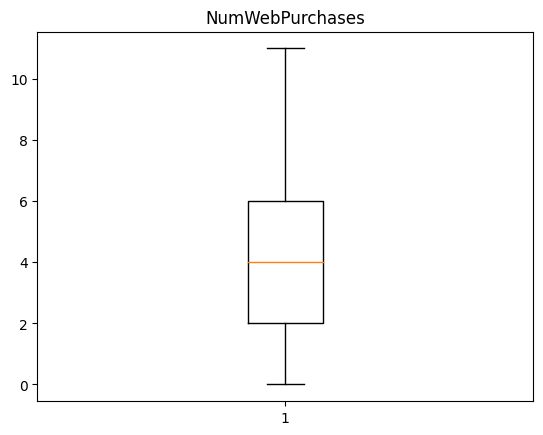

In [70]:
plt.boxplot(df_marketing_campaign['NumWebPurchases'], flierprops=red_circle)
plt.title('NumWebPurchases')
plt.show()

### NumCatalogPurchases Column

In [71]:
df_marketing_campaign['NumCatalogPurchases'].describe()

count    2205.000000
mean        2.632200
std         2.746943
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        11.000000
Name: NumCatalogPurchases, dtype: float64

In [72]:
df_marketing_campaign['NumCatalogPurchases'].sort_values(ascending=False).head(15)

984     11
1958    11
1745    11
764     11
1212    11
777     11
1940    11
1452    11
636     11
1465    11
627     11
1906    11
591     11
586     11
1492    11
Name: NumCatalogPurchases, dtype: int64

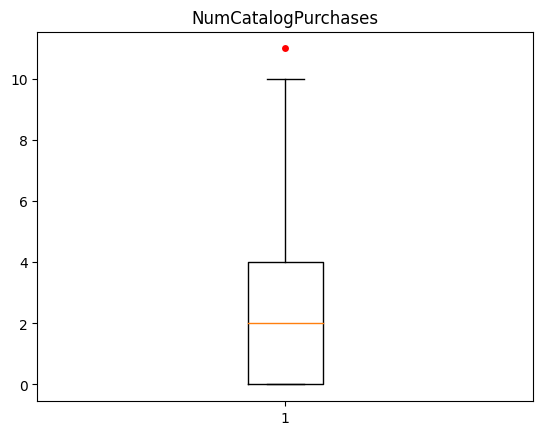

In [73]:
plt.boxplot(df_marketing_campaign['NumCatalogPurchases'], flierprops=red_circle)
plt.title('NumCatalogPurchases')
plt.show()

In [74]:
df_marketing_campaign['NumCatalogPurchases'].value_counts()

0     573
1     489
2     274
3     182
4     181
5     137
6     127
7      79
8      55
10     47
9      42
11     19
Name: NumCatalogPurchases, dtype: int64

We are not going to drop anything here in the NumCatalogPurchases Column

### NumWebVisitsMonth Column

In [75]:
df_marketing_campaign['NumWebVisitsMonth'].describe()

count    2205.000000
mean        5.336508
std         2.414445
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

In [76]:
df_marketing_campaign['NumWebVisitsMonth'].sort_values(ascending=False).head(15)

1245    20
774     20
9       20
1042    19
1846    19
1328    17
1524    14
981     14
2214    13
605     10
47      10
1868    10
1315     9
890      9
1334     9
Name: NumWebVisitsMonth, dtype: int64

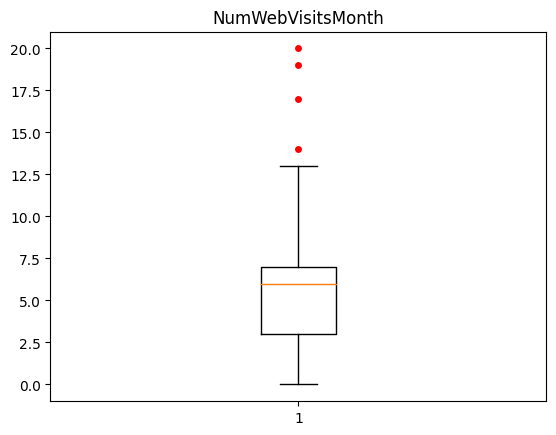

In [77]:
plt.boxplot(df_marketing_campaign['NumWebVisitsMonth'], flierprops=red_circle)
plt.title('NumWebVisitsMonth')
plt.show()

We are not going to drop anything here in the NumWebVisitsMonth Column

### Z_CostContact and Z_Revenue Columns

These columns have constant values and do not add anything valuable

In [ ]:
df_marketing_campaign.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

### Education Column

We are going to use Ordinal Encoder to assign each category to a different integer. The order will be:

0. Basic
1. Graduation
2. 2n Cycle
3. Master
4. PhD

In [80]:
df_marketing_campaign['Education'].value_counts()

Graduation    1112
PhD            476
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [127]:
categories = [['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD']]
oe_encoder = OrdinalEncoder(categories= categories)


In [128]:
df_marketing_campaign['Education_int'] = oe_encoder.fit_transform(df_marketing_campaign[['Education']])

In [129]:
df_marketing_campaign[['Education', 'Education_int']].value_counts()

Education   Education_int
Graduation  1.0              1112
PhD         4.0               476
Master      3.0               365
2n Cycle    2.0               198
Basic       0.0                54
dtype: int64

In [130]:
oe_encoder.categories_

[array(['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD'], dtype=object)]

### Marital_Status Column

In [132]:
df_marketing_campaign['Marital_Status'].value_counts()

Married     853
Together    570
Single      468
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [140]:
index_to_drop = df_marketing_campaign['Marital_Status'][df_marketing_campaign['Marital_Status'].isin(['YOLO', 'Absurd'])].index

df_marketing_campaign.drop(index=index_to_drop, axis=0, inplace=True)


In [141]:
df_marketing_campaign['Marital_Status'].value_counts()

Married     853
Together    570
Single      468
Divorced    231
Widow        76
Alone         3
Name: Marital_Status, dtype: int64

In [145]:
df_marketing_campaign['Marital_Status'].replace(['Alone'], ['Single'], inplace=True)
df_marketing_campaign['Marital_Status'].value_counts()

Married     853
Together    570
Single      471
Divorced    231
Widow        76
Name: Marital_Status, dtype: int64

In [151]:
ohe_encoder = OneHotEncoder(sparse_output=False)
results_ohe = ohe_encoder.fit_transform(df_marketing_campaign[['Marital_Status']])
results_ohe

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

---
---
---
---
---
---
---

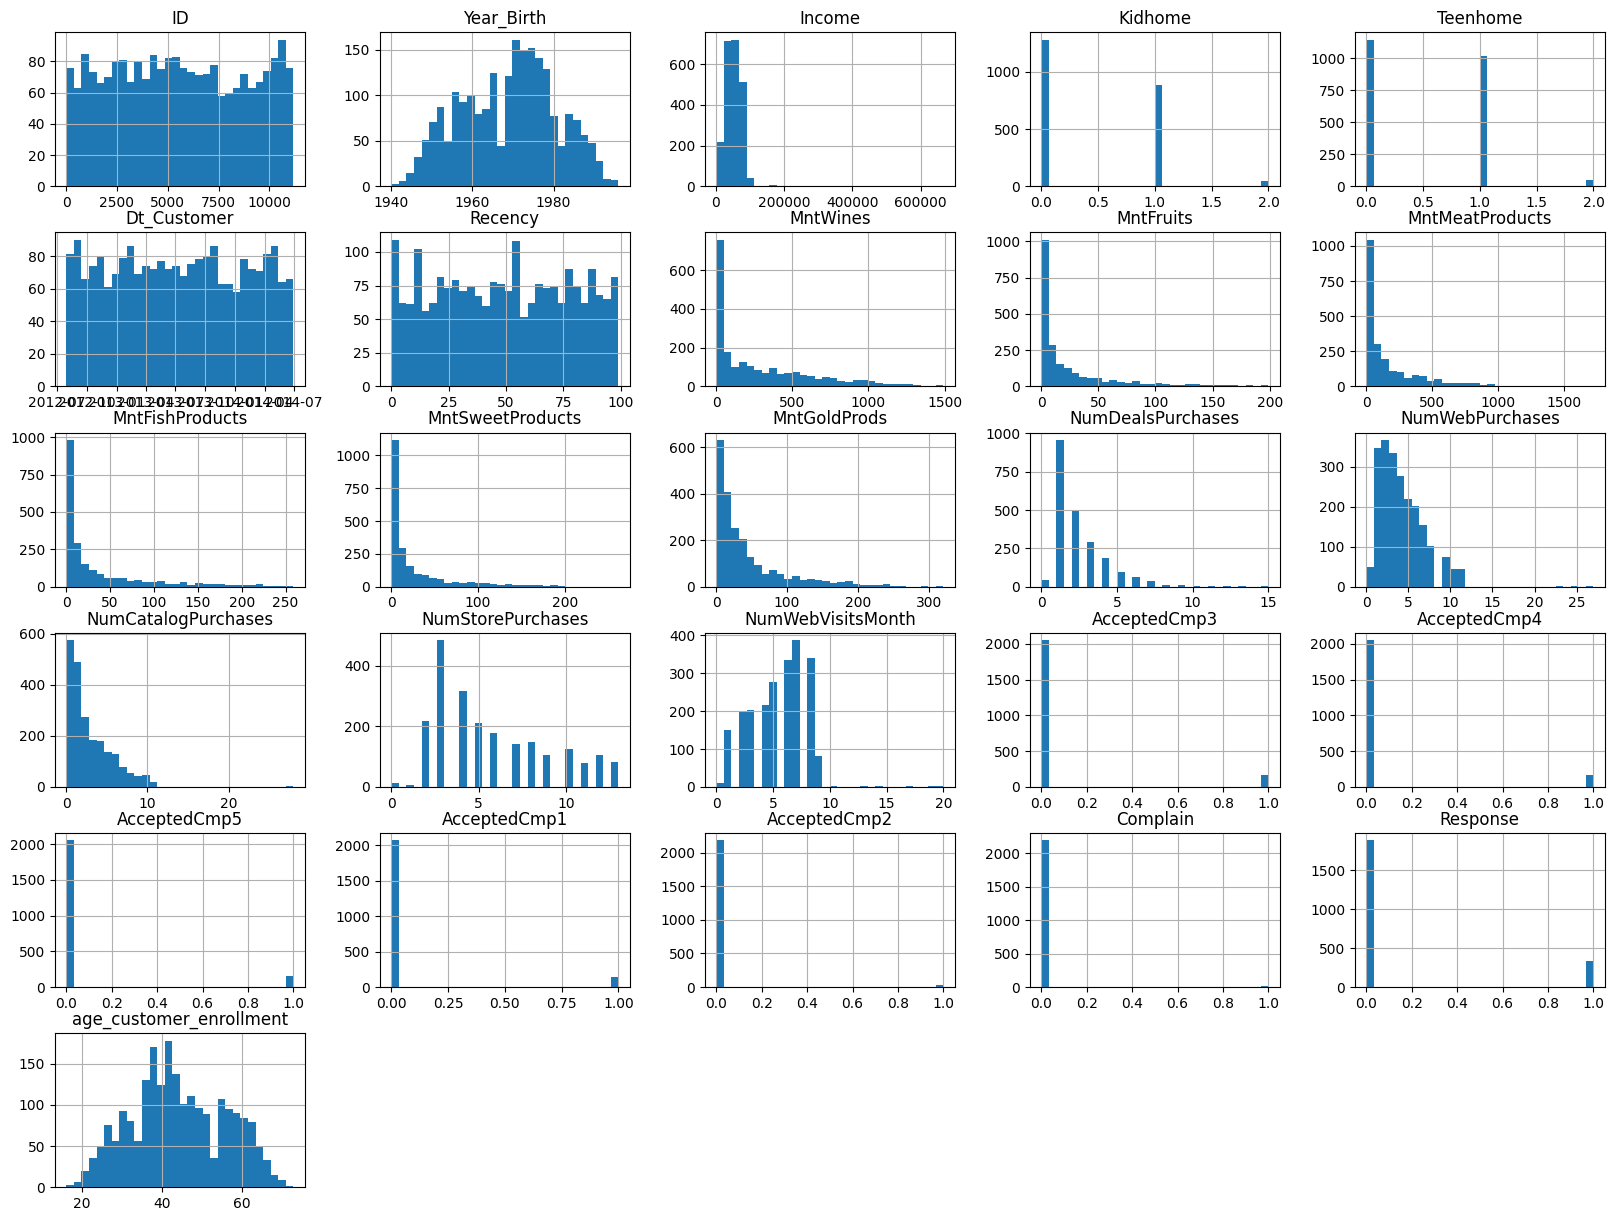

In [29]:
df_marketing_campaign.hist(bins=30, figsize=(20, 15))
plt.show()

## Dealing with NULL values

In [ ]:
df_marketing_campaign.isna().sum()

In [ ]:
df_marketing_campaign.loc[(df_marketing_campaign['Income'].isna() == True),['Income']].count()

In [ ]:
df_marketing_campaign.loc[(df_marketing_campaign['Income'].isna() == True)]

In [ ]:
df_marketing_campaign.dropna(inplace=True)

In [ ]:
df_marketing_campaign.describe()

In [ ]:
df_marketing_campaign[df_marketing_campaign.duplicated()]

In [ ]:
int_cols = df_marketing_campaign.select_dtypes(exclude='object').columns

for _ in int_cols:
  plt.figure(figsize=(10,10))
  sns.boxplot(data=df_marketing_campaign.reset_index(), y=_)
  plt.show()

In [ ]:
# CREATE THE MATRIX
matrix = df_marketing_campaign.corr()

# CREATE CMAP
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                          n=9, center="light", as_cmap=True)
# CREATE A MASK
mask = np.triu(np.ones_like(matrix, dtype=bool))

# MAKE FIGSIZE BIGGER
fig, ax = plt.subplots(figsize=(16,12))

# PLOT THE MATRIX
_ = sns.heatmap(matrix, mask=mask, center=0, annot=True,
          fmt='.2f', square=True, cmap=cmap, ax=ax)

In [ ]:
df_marketing_campaign['Income'].hist()

In [ ]:
df_marketing_campaign_num = df_marketing_campaign.drop(columns=['ID']).select_dtypes(exclude='object')

In [ ]:
standard_scaler = StandardScaler()

array_marketing_campaign_num_scaled = standard_scaler.fit_transform(df_marketing_campaign_num)

In [ ]:
df_marketing_campaign_num_scaled =  pd.DataFrame(array_marketing_campaign_num_scaled, columns=df_marketing_campaign_num.columns)
df_marketing_campaign_num_scaled.head()

In [ ]:
df_marketing_campaign_num_scaled.describe()

## With PCA

In [ ]:
pca = PCA()
pca.fit(df_marketing_campaign_num_scaled)

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
plt.plot(np.cumsum(np.round(pca.explained_variance_ratio_, 4)*100))


In [ ]:
array_marketing_campaign_num_scaled_pca = pca.transform(df_marketing_campaign_num_scaled)
df_marketing_campaign_num_scaled_pca10 = pd.DataFrame(array_marketing_campaign_num_scaled_pca).iloc[:,0:11]
df_marketing_campaign_num_scaled_pca15 = pd.DataFrame(array_marketing_campaign_num_scaled_pca).iloc[:,0:16]

In [ ]:
sum_of_squared_distances_pca10 = []
silhouette_scores_pca10 = []
sum_of_squared_distances_pca15 = []
silhouette_scores_pca15 = []
k = range(2,15)
for _ in k:
  kmeans_model_pca10 = KMeans(n_clusters=_)
  kmeans_model_pca15 = KMeans(n_clusters=_)
  y_pca10 = kmeans_model_pca10.fit_predict(df_marketing_campaign_num_scaled_pca10)
  y_pca15 = kmeans_model_pca15.fit_predict(df_marketing_campaign_num_scaled_pca15)
  sum_of_squared_distances_pca10.append(kmeans_model_pca10.inertia_)
  sum_of_squared_distances_pca15.append(kmeans_model_pca15.inertia_)
  silhouette_scores_pca10.append(silhouette_score(df_marketing_campaign_num_scaled_pca10, y_pca10))
  silhouette_scores_pca15.append(silhouette_score(df_marketing_campaign_num_scaled_pca15, y_pca15))

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(sum_of_squared_distances_pca10, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(silhouette_scores_pca10, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhouette Scores')
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(sum_of_squared_distances_pca15, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(silhouette_scores_pca15, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhouette Scores')
plt.show()

In [ ]:
kmeans_model_pca10 = KMeans(n_clusters=3)
y_pca10 = kmeans_model_pca10.fit_predict(df_marketing_campaign_num_scaled_pca10)
print(silhouette_score(df_marketing_campaign_num_scaled_pca10,y_pca10))

In [ ]:
kmeans_model_pca15 = KMeans(n_clusters=3)
y_pca15 = kmeans_model_pca15.fit_predict(df_marketing_campaign_num_scaled_pca15)
print(silhouette_score(df_marketing_campaign_num_scaled_pca15,y_pca15))

In [ ]:
df_marketing_campaign['kmeans_pca10'] = y_pca10
df_marketing_campaign['kmeans_pca15'] = y_pca15

## Without PCA

In [ ]:
sum_of_squared_distances = []
silhouette_scores = []
k = range(2,15)
for _ in k:
  kmeans_model = KMeans(n_clusters=_)
  y = kmeans_model.fit_predict(df_marketing_campaign_num_scaled)
  sum_of_squared_distances.append(kmeans_model.inertia_)
  silhouette_scores.append(silhouette_score(df_marketing_campaign_num_scaled, y))
  

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhouette Scores')
plt.show()

In [ ]:
kmeans_model = KMeans(n_clusters=2)
y = kmeans_model.fit_predict(df_marketing_campaign_num_scaled)
print(silhouette_score(df_marketing_campaign_num_scaled,y))

In [ ]:
df_marketing_campaign['kmeans'] = y

# Agglomerative Clustering

## PCA 10

In [ ]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_marketing_campaign_num_scaled_pca10, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
agglomerative_model_c2_pca10 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agglomerative_model_c3_pca10 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agglomerative_model_c7_pca10 = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')

y_c2_pca10 = agglomerative_model_c2_pca10.fit_predict(df_marketing_campaign_num_scaled_pca10)
y_c3_pca10 = agglomerative_model_c3_pca10.fit_predict(df_marketing_campaign_num_scaled_pca10)
y_c7_pca10 = agglomerative_model_c7_pca10.fit_predict(df_marketing_campaign_num_scaled_pca10)

print(f'2 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca10,y_c2_pca10)}')
print(f'3 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca10,y_c3_pca10)}')
print(f'7 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca10,y_c7_pca10)}')

df_marketing_campaign['ac_pca10'] = y_c2_pca10

## PCA 15

In [ ]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_marketing_campaign_num_scaled_pca15, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
agglomerative_model_c2_pca15 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

y_c2_pca15 = agglomerative_model_c2_pca15.fit_predict(df_marketing_campaign_num_scaled_pca15)

print(f'2 clusters: {silhouette_score(df_marketing_campaign_num_scaled_pca15,y_c2_pca15)}')

df_marketing_campaign['ac_pca15'] = y_c2_pca15

## Without PCA

In [ ]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(df_marketing_campaign_num_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
agglomerative_model_c2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agglomerative_model_c3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agglomerative_model_c7 = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')

y_c2 = agglomerative_model_c2.fit_predict(df_marketing_campaign_num_scaled)
y_c3 = agglomerative_model_c3.fit_predict(df_marketing_campaign_num_scaled)
y_c7 = agglomerative_model_c7.fit_predict(df_marketing_campaign_num_scaled)

print(f'2 clusters: {silhouette_score(df_marketing_campaign_num_scaled,y_c2)}')
print(f'3 clusters: {silhouette_score(df_marketing_campaign_num_scaled,y_c3)}')
print(f'7 clusters: {silhouette_score(df_marketing_campaign_num_scaled,y_c7)}')

df_marketing_campaign['ac'] = y_c2


# DBSCAN

## 10 PCA

In [ ]:
nn_model = NearestNeighbors(n_neighbors=2)
nn_fit = nn_model.fit(df_marketing_campaign_num_scaled_pca10)
distances, indices = nn_fit.kneighbors(df_marketing_campaign_num_scaled_pca10)

In [ ]:
distances = np.sort(distances, axis=0)
distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.show()

In [ ]:
eps_values = np.arange(3.5, 5, 0.1)
min_samples = np.arange(2,10)

In [ ]:
dbscan_params = list(product(eps_values,min_samples))

sil_scores = []
n_clusters = []
for p in dbscan_params:
  y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_marketing_campaign_num_scaled_pca10)
  sil_scores.append(silhouette_score(df_marketing_campaign_num_scaled_pca10,y_pred))
  n_clusters.append(len(np.unique(y_pred)))

In [ ]:
df_param_tunning = pd.DataFrame(dbscan_params, columns=['eps','min_samples'])
df_param_tunning['sil_scores'] = sil_scores
df_param_tunning['n_clusters'] = n_clusters

In [ ]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_scores', columns='eps', index='min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='eps', index='min_samples')

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
dbscan_model = DBSCAN(eps=4.4, min_samples=4)
y_dbscan_pca10 = dbscan_model.fit_predict(df_marketing_campaign_num_scaled_pca10)

print(silhouette_score(df_marketing_campaign_num_scaled_pca10, y_dbscan_pca10))
df_marketing_campaign['DBSCAN_pca10'] = y_dbscan_pca10

## 15 PCA

In [ ]:
nn_model = NearestNeighbors(n_neighbors=2)
nn_fit = nn_model.fit(df_marketing_campaign_num_scaled_pca15)
distances, indices = nn_fit.kneighbors(df_marketing_campaign_num_scaled_pca15)

In [ ]:
distances = np.sort(distances, axis=0)
distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.show()

In [ ]:
eps_values = np.arange(4.5, 7, 0.1)
min_samples = np.arange(2,10)

In [ ]:
dbscan_params = list(product(eps_values,min_samples))

sil_scores = []
n_clusters = []
for p in dbscan_params:
  y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_marketing_campaign_num_scaled_pca15)
  sil_scores.append(silhouette_score(df_marketing_campaign_num_scaled_pca15,y_pred))
  n_clusters.append(len(np.unique(y_pred)))

In [ ]:
df_param_tunning = pd.DataFrame(dbscan_params, columns=['eps','min_samples'])
df_param_tunning['sil_scores'] = sil_scores
df_param_tunning['n_clusters'] = n_clusters

In [ ]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_scores', columns='eps', index='min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='eps', index='min_samples')

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, fmt='.3f', annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
dbscan_model = DBSCAN(eps=6.9, min_samples=5)
y_dbscan_pca15 = dbscan_model.fit_predict(df_marketing_campaign_num_scaled_pca15)

print(silhouette_score(df_marketing_campaign_num_scaled_pca15, y_dbscan_pca15))
df_marketing_campaign['DBSCAN_pca15'] = y_dbscan_pca15

## Without PCA

In [ ]:
nn_model = NearestNeighbors(n_neighbors=2)
nn_fit = nn_model.fit(df_marketing_campaign_num_scaled)
distances, indices = nn_fit.kneighbors(df_marketing_campaign_num_scaled)

In [ ]:
distances = np.sort(distances, axis=0)
distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.show()

In [ ]:
eps_values = np.arange(2.5, 6, 0.1)
min_samples = np.arange(2,10)

In [ ]:
dbscan_params = list(product(eps_values,min_samples))

sil_scores = []
n_clusters = []
for p in dbscan_params:
  y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_marketing_campaign_num_scaled)
  sil_scores.append(silhouette_score(df_marketing_campaign_num_scaled,y_pred))
  n_clusters.append(len(np.unique(y_pred)))

In [ ]:
df_param_tunning = pd.DataFrame(dbscan_params, columns=['eps','min_samples'])
df_param_tunning['sil_scores'] = sil_scores
df_param_tunning['n_clusters'] = n_clusters

In [ ]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_scores', columns='eps', index='min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='eps', index='min_samples')

In [ ]:
fig, ax = plt.subplots(figsize=(26,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
dbscan_model = DBSCAN(eps=8.6, min_samples=5)
y_dbscan = dbscan_model.fit_predict(df_marketing_campaign_num_scaled)

print(silhouette_score(df_marketing_campaign_num_scaled, y_dbscan))
df_marketing_campaign['DBSCAN'] = y_dbscan

In [ ]:
df_marketing_campaign.columns

In [ ]:
df_marketing_campaign_num.columns

In [ ]:
sns.pairplot(data= df_marketing_campaign[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'DBSCAN_pca10']], hue='DBSCAN_pca10', palette='coolwarm')